In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#inputes = Pclass , Sex ,Age ,Fare
#target = Survived

In [4]:
#inputes = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
#inputes.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [7]:
#traget = df['Survived']
#traget

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df_new = df.dropna()

In [12]:
df_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df_new.shape

(183, 12)

In [14]:
df_new = df_new.drop_duplicates()

In [15]:
df_new.shape

(183, 12)

In [16]:
inputes = df_new.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
inputes.head()

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500


In [30]:
inputes_encoded = pd.get_dummies(inputes['Sex'])
inputes_encoded=inputes_encoded.astype('int')
inputes_encoded

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [32]:
new_inpute = pd.concat([inputes,inputes_encoded],axis=1)
new_inpute

,Pclass,Sex,Age,Fare,female,male
1,1,female,38.0,71.2833,1,0
3,1,female,35.0,53.1000,1,0
6,1,male,54.0,51.8625,0,1
10,3,female,4.0,16.7000,1,0
11,1,female,58.0,26.5500,1,0
...,...,...,...,...,...,...
871,1,female,47.0,52.5542,1,0
872,1,male,33.0,5.0000,0,1
879,1,female,56.0,83.1583,1,0
887,1,female,19.0,30.0000,1,0


In [33]:
new_inpute = new_inpute.drop('Sex',axis=1)
new_inpute

,Pclass,Age,Fare,female,male
1,1,38.0,71.2833,1,0
3,1,35.0,53.1000,1,0
6,1,54.0,51.8625,0,1
10,3,4.0,16.7000,1,0
11,1,58.0,26.5500,1,0
...,...,...,...,...,...
871,1,47.0,52.5542,1,0
872,1,33.0,5.0000,0,1
879,1,56.0,83.1583,1,0
887,1,19.0,30.0000,1,0


In [34]:
traget = df_new['Survived']
traget

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

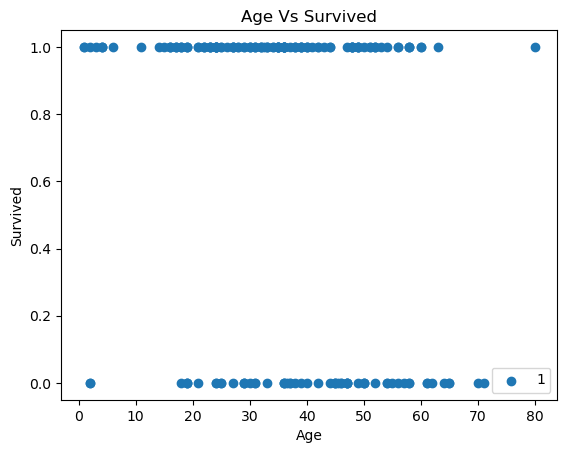

In [22]:
#now ploting the scatter plot between the age and survive
plt.scatter(df_new['Age'],df_new['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age Vs Survived')
plt.legend(df_new['Survived'])
plt.show()

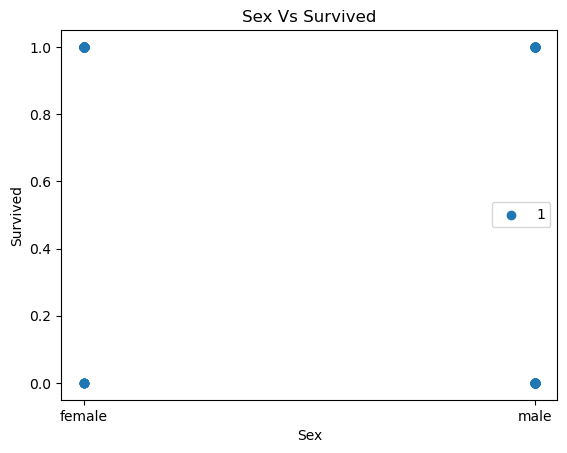

In [23]:
plt.scatter(df_new['Sex'],df_new['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Sex Vs Survived')
plt.legend(df_new['Survived'])
plt.show()

In [35]:
#now using the tain test split
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(new_inpute,traget,test_size=0.2,random_state=42)

In [37]:
#now model bulding using Decision Tress Classification
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
dtc_model.score(X_test,y_test)

0.7297297297297297

In [42]:
dtc_model.predict([[1,38 ,71,1,0]])

C:\Users\91952\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)